# ITOM 6267 - Data Mining
*Alex Grill, Fall 2022*

In [1]:
# Import libraries and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("C:/Users/alexg/Documents/ITOM6267/Data Files/adult.csv", header = None)
 
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
# Add variable names
col_names = ["Age", "WorkClass", "Final_Weight", "Education",
             "Edu_Num", "Marital_Status", "Occupation", "Relationship",
             "Race", "Sex", "Capital_Gain", "Capital_Loss", "Hours_per_Week",
             "Native_Country", "Income"]

data.columns = col_names

data.head()

,Age,WorkClass,Final_Weight,Education,Edu_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Q1: How many observations (rows) and how many variables (columns) are there in the raw data?

In [3]:
# Adding the whole dataset by replicating each row with its corresponding Final_Weight
fw_sum = data['Final_Weight'].sum()

In [4]:
print("Actual Number of Rows is:", fw_sum, ", however we have rescaled it and got:", int(fw_sum/10000))
print("The data file given without final weight replication, has:", data.shape[0],"rows")
print("Number of Columns is:", data.shape[1])

Actual Number of Rows is: 6179373392 , however we have rescaled it and got: 617937
The data file given without final weight replication, has: 32561 rows
Number of Columns is: 15


###  Q2: Produce a table of variables showing their types. 

In [5]:
# Table of variables showing the variables and observations before rescaling
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   WorkClass       32561 non-null  object
 2   Final_Weight    32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Edu_Num         32561 non-null  int64 
 5   Marital_Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_per_Week  32561 non-null  int64 
 13  Native_Country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# Table after rescaling Final_Weight by 10000 and replicating each row Final_Weight times:
data['Final_Weight'] = data['Final_Weight']/10000

# Replication of each row Final_Weight (rescaled 10k) times
data = data.reindex(data.index.repeat(data['Final_Weight']))
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 601554 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             601554 non-null  int64  
 1   WorkClass       601554 non-null  object 
 2   Final_Weight    601554 non-null  float64
 3   Education       601554 non-null  object 
 4   Edu_Num         601554 non-null  int64  
 5   Marital_Status  601554 non-null  object 
 6   Occupation      601554 non-null  object 
 7   Relationship    601554 non-null  object 
 8   Race            601554 non-null  object 
 9   Sex             601554 non-null  object 
 10  Capital_Gain    601554 non-null  int64  
 11  Capital_Loss    601554 non-null  int64  
 12  Hours_per_Week  601554 non-null  int64  
 13  Native_Country  601554 non-null  object 
 14  Income          601554 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 73.4+ MB


### Q3: Which numeric variables should be treated as categorical?

In [7]:
# Checking the unique values of every variable:
data.nunique(axis = 0)
    # Answer: Other column to treat as categorical is Edu_Num

Age                  73
WorkClass             9
Final_Weight      21648
Education            16
Edu_Num              16
Marital_Status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_Gain        119
Capital_Loss         92
Hours_per_Week       94
Native_Country       42
Income                2
dtype: int64

In [8]:
# Checking if we have anything unusual in the categorical variables
for cols in ['WorkClass','Education', 'Edu_Num','Marital_Status','Occupation',
             'Relationship','Race','Sex','Native_Country','Income']:
    print(cols ," : ",data[cols].value_counts())
    print('\n')

# WorkClass : 1836 values for '?'  it could be some private work
# Occupation : 1843 values for '?'  can give them 'Random Job' name
# Native Country : 583 values for '?'  could be random country

WorkClass  :   Private             426048
 Self-emp-not-inc     43355
 Local-gov            38426
 ?                    33695
 State-gov            23256
 Self-emp-inc         19085
 Federal-gov          17297
 Without-pay            238
 Never-worked           154
Name: WorkClass, dtype: int64


Education  :   HS-grad         193717
 Some-college    133929
 Bachelors        98016
 Masters          30134
 Assoc-voc        24441
 11th             22313
 Assoc-acdm       20112
 10th             17915
 7th-8th          11831
 Prof-school      10403
 9th              10146
 12th              8404
 5th-6th           7573
 Doctorate         7503
 1st-4th           3939
 Preschool         1178
Name: Education, dtype: int64


Edu_Num  :  9     193717
10    133929
13     98016
14     30134
11     24441
7      22313
12     20112
6      17915
4      11831
15     10403
5      10146
8       8404
3       7573
16      7503
2       3939
1       1178
Name: Edu_Num, dtype: int64


Marital_Status  :   Ma

### Q4: For numeric variables, produce a table of statistics including missing values, min, max, median, mean, standard deviation, skewness and kurtosis.

In [9]:
# List of numeric variables

num_vars = ['Age', 'Capital_Gain','Capital_Loss','Hours_per_Week']

# Stats 
stats = ['min', 'max', 'mean', 'median', 'std', 'skew', 'kurtosis']

data[num_vars].agg(stats)

# Analysis : Capital_Gain & Capital_Loss have kurtosis values > 3 which is a red flag, need to check Outlier

,Age,Capital_Gain,Capital_Loss,Hours_per_Week
min,17.000000,0.000000,0.000000,1.000000
max,90.000000,99999.000000,4356.000000,99.000000
mean,37.984527,1079.541183,84.945583,40.305065
median,36.000000,0.000000,0.000000,40.000000
std,13.464064,7436.344622,396.624057,12.087739
skew,0.595833,11.909010,4.644934,0.203340
kurtosis,-0.119916,153.196906,20.801014,2.985449


### Q5: Count the unique values of each categorical variable, including missing values. Are there any unusual values in any of the categorical variables? 

In [10]:
# Data Cleaning (Changing '?' values in 3 variables to 'Unknown'):
data.WorkClass = data.WorkClass.str.replace('?','Unknown')
data.Occupation = data.Occupation.str.replace('?','Unknown')
data.Native_Country = data.Native_Country.str.replace('?','Unknown')

# Show alterations:
print(data.WorkClass.value_counts())
print(data.Occupation.value_counts())
print(data.Native_Country.value_counts())

C:\Users\alexg\AppData\Local\Temp\ipykernel_12864\3296289783.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.WorkClass = data.WorkClass.str.replace('?','Unknown')
C:\Users\alexg\AppData\Local\Temp\ipykernel_12864\3296289783.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.Occupation = data.Occupation.str.replace('?','Unknown')


 Private             426048
 Self-emp-not-inc     43355
 Local-gov            38426
 Unknown              33695
 State-gov            23256
 Self-emp-inc         19085
 Federal-gov          17297
 Without-pay            238
 Never-worked           154
Name: WorkClass, dtype: int64
 Craft-repair         76689
 Prof-specialty       74633
 Exec-managerial      72954
 Adm-clerical         70507
 Sales                67836
 Other-service        60498
 Machine-op-inspct    38035
 Unknown              33849
 Transport-moving     29586
 Handlers-cleaners    27310
 Tech-support         17350
 Farming-fishing      16421
 Protective-serv      12776
 Priv-house-serv       2920
 Armed-Forces           190
Name: Occupation, dtype: int64
 United-States                 531003
 Mexico                         18290
 Unknown                        10966
 Philippines                     3197
 El-Salvador                     2644
 Germany                         2528
 Cuba                            2293
 

C:\Users\alexg\AppData\Local\Temp\ipykernel_12864\3296289783.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.Native_Country = data.Native_Country.str.replace('?','Unknown')


### Q6: How many outliers are present in each numeric variable? Show the tallies in a table. Set them to missing.

In [11]:
# Initial analysis: since we checked through kurtosis and saw that Capital_Gain and Capital_Loss have values to that could be outliers
    # Checking if there can be more variables with outliers and set them missing
    
# Check if data already has any missing values
data.isna().sum()

Age               0
WorkClass         0
Final_Weight      0
Education         0
Edu_Num           0
Marital_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_Gain      0
Capital_Loss      0
Hours_per_Week    0
Native_Country    0
Income            0
dtype: int64

C:\Users\alexg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Capital_Gain'>

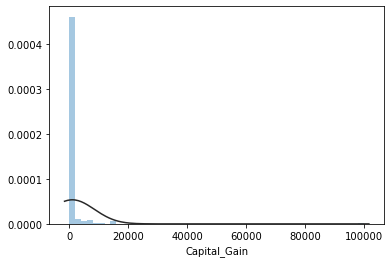

In [12]:
# To shape the data and better use capital gain and loss, we group it together as a new variable
    # Reference Idea 1: https://towardsdatascience.com/a-beginners-guide-to-data-analysis-machine-learning-with-python-adult-salary-dataset-e5fc028b6f0a
    # Reference Idea 2: https://rpubs.com/vassitar/us_census_preprocessing and few others 
# Doing this because there are too many zeros in the variables “capital_gain” and “capital_loss” which can disrupt the analysis.

# View both and verify the same
from scipy.stats import norm 
sns.distplot(data['Capital_Gain'], kde = False, fit = norm)

C:\Users\alexg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Capital_Loss'>

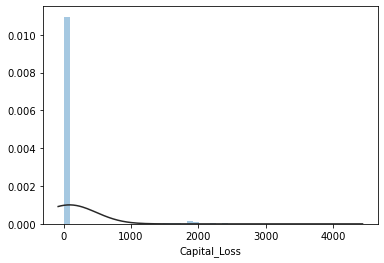

In [13]:
from scipy.stats import norm
sns.distplot(data['Capital_Loss'], kde = False, fit = norm)

In [14]:
# Group into net_capital = capital_gain - captial loss
data['NetCapital'] = data['Capital_Gain'] - data['Capital_Loss']
data.head(10)

# From the table we see, there are 2 possibilities:
    # net_capital = 0 values, or non zero values

,Age,WorkClass,Final_Weight,Education,Edu_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income,NetCapital
0,39,State-gov,7.7516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,2174
0,39,State-gov,7.7516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,2174
0,39,State-gov,7.7516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,2174
0,39,State-gov,7.7516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,2174
0,39,State-gov,7.7516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,2174
0,39,State-gov,7.7516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,2174
0,39,State-gov,7.7516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,2174
1,50,Self-emp-not-inc,8.3311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
1,50,Self-emp-not-inc,8.3311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
1,50,Self-emp-not-inc,8.3311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0


In [15]:
# Add Net_Capital to num_vars:
num_vars.append('NetCapital')
data[num_vars].head()

,Age,Capital_Gain,Capital_Loss,Hours_per_Week,NetCapital
0,39,2174,0,40,2174
0,39,2174,0,40,2174
0,39,2174,0,40,2174
0,39,2174,0,40,2174
0,39,2174,0,40,2174


In [16]:
# Find outliers and getting total of outlier in each column:
for col in num_vars :
    data[col] = np.where(np.abs(data[col] - data[col].mean()) > (3 * data[col].std()), np.nan, data[col])

# Number of NA's will tell us number of outliers
data.isna().sum()

# Alternative way to do outlier detection:
    # for col in num_vars :
        # outlier_data[col] = np.where(np.abs(outlier_data[col] - outlier_data[col].mean()) > (3 * outlier_data[col].std()), np.nan, outlier_data[col])

    # how many na's will tell us number of outliers
    # outlier_data.isna().sum()

# Outliers are in : Age, Capital_Gain (very high), Capital_Loss, Hours_per_Week

Age                2228
WorkClass             0
Final_Weight          0
Education             0
Edu_Num               0
Marital_Status        0
Occupation            0
Relationship          0
Race                  0
Sex                   0
Capital_Gain       3948
Capital_Loss      26524
Hours_per_Week     8645
Native_Country        0
Income                0
NetCapital         3948
dtype: int64

### Q7: Impute the missing values.

In [17]:
# See where the numerical variables stats stand prior to imputation
data[num_vars].agg(stats)

,Age,Capital_Gain,Capital_Loss,Hours_per_Week,NetCapital
min,17.000000,0.000000,0.000000,5.000000,-4356.000000
max,78.000000,22040.000000,1258.000000,76.000000,22040.000000
mean,37.813444,540.644605,1.186284,39.990719,455.137842
median,36.000000,0.000000,0.000000,40.000000,0.000000
std,13.190230,2277.062317,32.627358,10.920572,2331.474298
skew,0.512822,5.075867,30.129031,-0.321149,4.785426
kurtosis,-0.417142,27.624990,960.257910,1.463032,25.618234


In [18]:
# Before moving forward, let's do some data cleaning
print((data['Education'].value_counts(),data['Edu_Num'].value_counts()))

# Education and Edu_num are giving the exact same values (i.e., bachelors = 13, both contain 98016)
    # Thus we can remove this column and simplify the data
data.drop('Edu_Num', axis = 1 , inplace = True)

( HS-grad         193717
 Some-college    133929
 Bachelors        98016
 Masters          30134
 Assoc-voc        24441
 11th             22313
 Assoc-acdm       20112
 10th             17915
 7th-8th          11831
 Prof-school      10403
 9th              10146
 12th              8404
 5th-6th           7573
 Doctorate         7503
 1st-4th           3939
 Preschool         1178
Name: Education, dtype: int64, 9     193717
10    133929
13     98016
14     30134
11     24441
7      22313
12     20112
6      17915
4      11831
15     10403
5      10146
8       8404
3       7573
16      7503
2       3939
1       1178
Name: Edu_Num, dtype: int64)


In [19]:
for c in data.columns:
    print ("---- %s ---" % c)
    print (data[c].value_counts())

---- Age ---
23.0    17648
31.0    17007
36.0    16974
33.0    16887
34.0    16798
        ...  
74.0      798
76.0      782
75.0      712
77.0      439
78.0      368
Name: Age, Length: 62, dtype: int64
---- WorkClass ---
 Private             426048
 Self-emp-not-inc     43355
 Local-gov            38426
 Unknown              33695
 State-gov            23256
 Self-emp-inc         19085
 Federal-gov          17297
 Without-pay            238
 Never-worked           154
Name: WorkClass, dtype: int64
---- Final_Weight ---
34.0917    272
38.1153    266
24.1998    264
20.3488    260
60.9789    240
          ... 
1.9520       1
1.9899       1
1.8827       1
1.2285       1
1.9214       1
Name: Final_Weight, Length: 21648, dtype: int64
---- Education ---
 HS-grad         193717
 Some-college    133929
 Bachelors        98016
 Masters          30134
 Assoc-voc        24441
 11th             22313
 Assoc-acdm       20112
 10th             17915
 7th-8th          11831
 Prof-school      10403
 9

In [20]:
# Feature Engineering : We can see that some of the data provided are unique; ‘workclass’ attribute which has only 9 distinct values
    # Some columns have a lot of distinct values like Final_Weight which has around 2000
    # This is of no use to us, thus we can drop it
data.drop('Final_Weight', axis = 1, inplace = True)
data.head(2)

,Age,WorkClass,Education,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income,NetCapital
0,39.0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K,2174.0
0,39.0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K,2174.0


In [21]:
# We can change NetCapital into a binary variable, this will solve the outliers problem:
data['NetCapital'] = data['NetCapital'].astype('bool') * 1
data['NetCapital'].value_counts()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 601554 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             599326 non-null  float64
 1   WorkClass       601554 non-null  object 
 2   Education       601554 non-null  object 
 3   Marital_Status  601554 non-null  object 
 4   Occupation      601554 non-null  object 
 5   Relationship    601554 non-null  object 
 6   Race            601554 non-null  object 
 7   Sex             601554 non-null  object 
 8   Capital_Gain    597606 non-null  float64
 9   Capital_Loss    575030 non-null  float64
 10  Hours_per_Week  592909 non-null  float64
 11  Native_Country  601554 non-null  object 
 12  Income          601554 non-null  object 
 13  NetCapital      601554 non-null  int32  
dtypes: float64(4), int32(1), object(9)
memory usage: 66.5+ MB


In [22]:
# Verify outliers in NetCapital
num_vars.append('NetCapital')

data[num_vars].agg(stats)

# NetCapital data now looks good to use
    # NetCapital = 0 , there is No Impact or a Capital Loss (massive majority are No Impact)
    # NetCapital = 1 , there is Capital Gain
# Going foward, we will drop the Capital_Gain and Capital_Loss variables

,Age,Capital_Gain,Capital_Loss,Hours_per_Week,NetCapital,NetCapital
min,17.000000,0.000000,0.000000,5.000000,0.000000,0.000000
max,78.000000,22040.000000,1258.000000,76.000000,1.000000,1.000000
mean,37.813444,540.644605,1.186284,39.990719,0.128058,0.128058
median,36.000000,0.000000,0.000000,40.000000,0.000000,0.000000
std,13.190230,2277.062317,32.627358,10.920572,0.334155,0.334155
skew,0.512822,5.075867,30.129031,-0.321149,2.226170,2.226170
kurtosis,-0.417142,27.624990,960.257910,1.463032,2.955842,2.955842


In [23]:
# Drop capital gain and loss
data.drop(['Capital_Gain', 'Capital_Loss'], axis = 1, inplace = True)
data.head(2)

,Age,WorkClass,Education,Marital_Status,Occupation,Relationship,Race,Sex,Hours_per_Week,Native_Country,Income,NetCapital
0,39.0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40.0,United-States,<=50K,1
0,39.0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40.0,United-States,<=50K,1


In [24]:
# Using interpolation method to replace the missing values in Age and Hours_per_Week. 
    # This is to avoid the data getting replaced with values higher than the variable mean
    
# We will use the nearest method for better accuracy
interp_vars = ['Age', 'Hours_per_Week']
for cols in interp_vars:
    data[interp_vars].interpolate(method='nearest', limit_direction = 'both')

In [25]:
impute_vars = ['Age', 'Hours_per_Week']

for v in impute_vars:
    data[v].fillna(value = data[v].mean(), inplace = True)
    
data.isnull().sum()

Age               0
WorkClass         0
Education         0
Marital_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours_per_Week    0
Native_Country    0
Income            0
NetCapital        0
dtype: int64

In [26]:
# Confirm kurtosis values are all under 3
num_vars_new = ['Age', 'Hours_per_Week', 'NetCapital']
data[num_vars_new].agg(stats)

,Age,Hours_per_Week,NetCapital
min,17.000000,5.000000,0.000000
max,78.000000,76.000000,1.000000
mean,37.813444,39.990719,0.128058
median,36.000000,40.000000,0.000000
std,13.165781,10.841818,0.334155
skew,0.513774,-0.323482,2.226170
kurtosis,-0.407540,1.528106,2.955842


In [27]:
# Confirming remaining 12 variables have the same observation totals
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 601554 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             601554 non-null  float64
 1   WorkClass       601554 non-null  object 
 2   Education       601554 non-null  object 
 3   Marital_Status  601554 non-null  object 
 4   Occupation      601554 non-null  object 
 5   Relationship    601554 non-null  object 
 6   Race            601554 non-null  object 
 7   Sex             601554 non-null  object 
 8   Hours_per_Week  601554 non-null  float64
 9   Native_Country  601554 non-null  object 
 10  Income          601554 non-null  object 
 11  NetCapital      601554 non-null  int32  
dtypes: float64(2), int32(1), object(9)
memory usage: 57.4+ MB


### Q8: Produce a histogram or boxplot for each of the numeric variables.

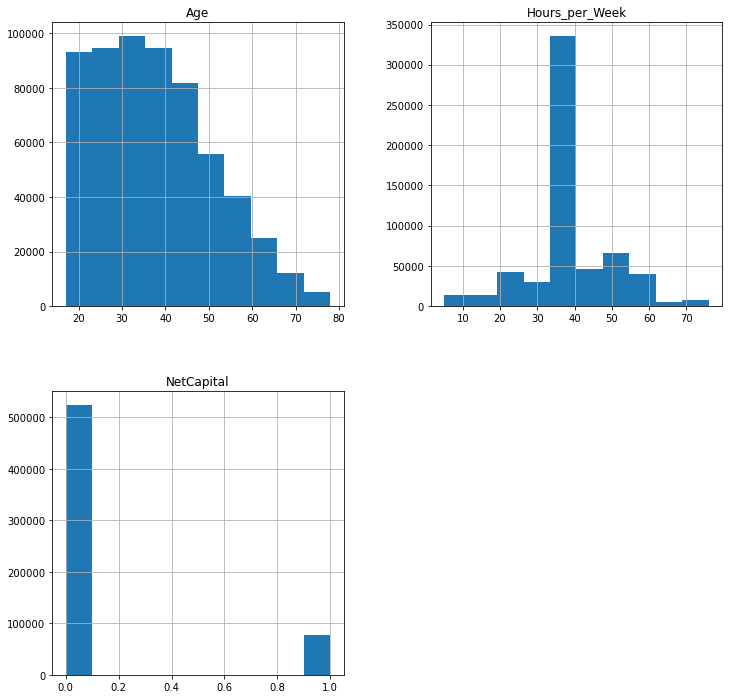

In [28]:
# All categorial variables
cat_col = data.dtypes[data.dtypes == 'object']

# All numeric variables
num_col = data.dtypes[data.dtypes != 'object']

#Histograms of numeric variables
data[list(num_col.index)].hist(figsize = (12,12));

### Q9: Produce a bar chart for each of the categorical variables showing the counts for each unique value.

In [29]:
cat_col = data.dtypes[data.dtypes == 'object']
cat_col
# Categorical Variables: WorkClass  Education  Martial_Status  Occupation  Relationship  Race  Sex  Native_Country  Income   

WorkClass         object
Education         object
Marital_Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Native_Country    object
Income            object
dtype: object

Text(0.5, 1.0, 'WorkClass')

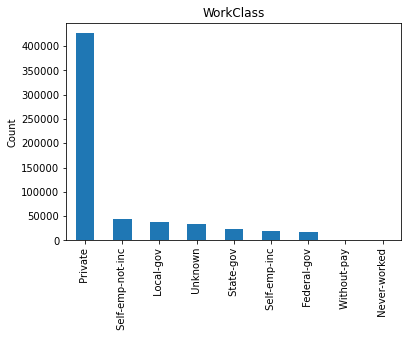

In [30]:
bar1 = pd.value_counts(data['WorkClass']).plot.bar()
bar1.set_ylabel("Count")
bar1.set_title("WorkClass")

Text(0.5, 1.0, 'Education')

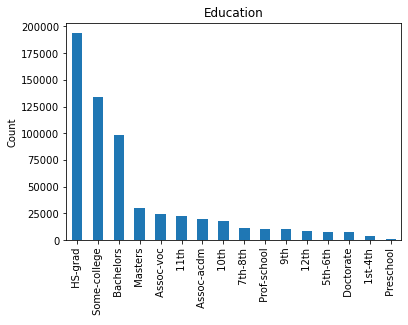

In [31]:
bar2= pd.value_counts(data['Education']).plot.bar()
bar2.set_ylabel("Count")
bar2.set_title("Education")

Text(0.5, 1.0, 'Marital Status')

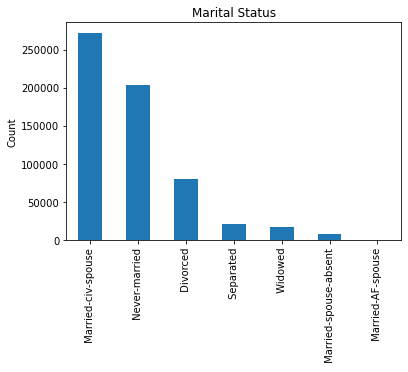

In [32]:
bar3= pd.value_counts(data['Marital_Status']).plot.bar()
bar3.set_ylabel("Count")
bar3.set_title("Marital Status")

Text(0.5, 1.0, 'Occupation')

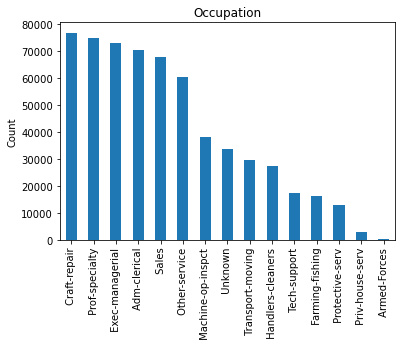

In [33]:
bar4= pd.value_counts(data['Occupation']).plot.bar()
bar4.set_ylabel("Count")
bar4.set_title("Occupation")

Text(0.5, 1.0, 'Relationship')

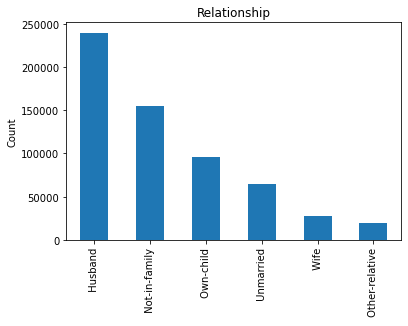

In [34]:
bar5= pd.value_counts(data['Relationship']).plot.bar()
bar5.set_ylabel("Count")
bar5.set_title("Relationship")

Text(0.5, 1.0, 'Race')

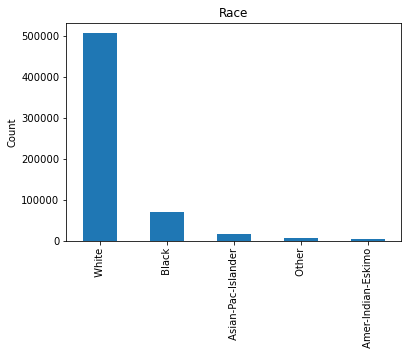

In [35]:
bar6=pd.value_counts(data['Race']).plot.bar()
bar6.set_ylabel("Count")
bar6.set_title("Race")

Text(0.5, 1.0, 'Sex')

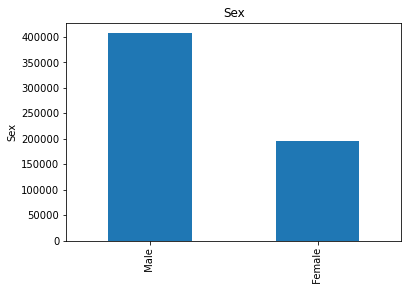

In [36]:
bar6=pd.value_counts(data['Sex']).plot.bar()
bar6.set_ylabel("Sex")
bar6.set_title("Sex")

Text(0.5, 1.0, 'Native_Country')

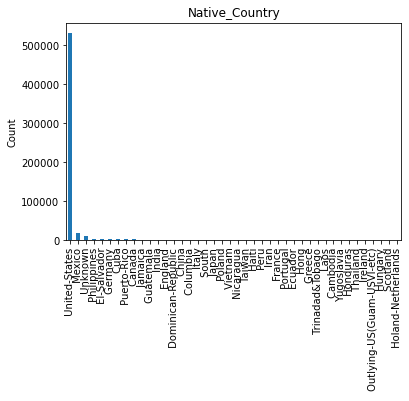

In [37]:
bar6=pd.value_counts(data['Native_Country']).plot.bar()
bar6.set_ylabel("Count")
bar6.set_title("Native_Country")

Text(0.5, 1.0, 'Income')

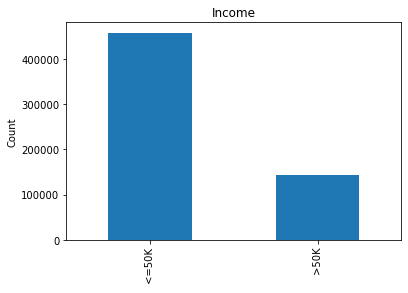

In [38]:
bar6=pd.value_counts(data['Income']).plot.bar()
bar6.set_ylabel("Count")
bar6.set_title("Income")

In [39]:
# Create CSV of cleaned data 
    # data.to_csv (r'C:\Users\alexg\Documents\ITOM6267\Data Files\adultClean.csv', index = False, header=True)